DESCRIPTION

**Background of Problem Statement :**

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.

**Domain:** Entertainment

**Analysis Tasks to be performed:**

*Feature Engineering:*
Use column genres:

- Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)
- Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
- Determine the features affecting the ratings of any particular movie.
Develop an appropriate model to predict the movie ratings

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Apply String class manilupation in column Genre

In [2]:
movies_df=pd.read_csv('G:\My Drive\Assignments\Part1-Python essential\Assesment_2\\movies.dat',encoding='ISO-8859-1',delimiter='::',header=None,
                      names=['MovieID','Title','Genres'])
ratings_df=pd.read_csv('G:\My Drive\Assignments\Part1-Python essential\Assesment_2\\ratings.dat',encoding='ISO-8859-1',delimiter='::',header=None,
                       names=['UserID','MovieID','Rating','Timestamp'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [3]:
movies_df1=movies_df.set_index('MovieID')

In [4]:
movies_df1

,Title,Genres
MovieID,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy
...,...,...
3948,Meet the Parents (2000),Comedy
3949,Requiem for a Dream (2000),Drama
3950,Tigerland (2000),Drama


In [5]:
### Join every string in every row, split the result, pull out the unique values.
genres = pd.unique('|'.join(movies_df1['Genres']).split('|'))

In [6]:
genres

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [7]:
# one-Hot encoding vector
for genre in genres:
    movies_df1[genre] = movies_df1['Genres'].str.contains(genre).astype('int')    

In [8]:
movies_df1.drop('Genres', axis=1, inplace=True)

In [9]:
movies_df1

,Title,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
MovieID,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,Waiting to Exhale (1995),0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,Father of the Bride Part II (1995),0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,Meet the Parents (2000),0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3949,Requiem for a Dream (2000),0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3950,Tigerland (2000),0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [10]:
data1=pd.read_csv(r'C:\Users\FB\PART1-Python Essentials\\data1.csv')
data2=pd.read_csv(r'C:\Users\FB\PART1-Python Essentials\data2.csv')

In [11]:
data2.set_index('UserID',inplace=True);
data1.set_index('MovieID',inplace=True)

In [12]:
master_data=pd.merge(data1,data2,left_index=True,right_index=True)

In [13]:
bins= [0,18,25,35,45,50,60]
labels = [1,2,3,4,5,6]
master_data['AgeGroup'] = pd.cut(master_data['Age'], bins=bins, labels=labels, right=False)

In [14]:
master_data.drop(['Age'],axis=1,inplace=True)

In [15]:
master_data

,Title,UserID,Rating,Occupation,AgeGroup
1,Toy Story (1995),2599,4,10,1
1,Toy Story (1995),2599,4,10,1
1,Toy Story (1995),2599,4,10,1
1,Toy Story (1995),2599,4,10,1
1,Toy Story (1995),2599,4,10,1
...,...,...,...,...,...
3952,"Contender, The (2000)",2177,5,1,5
3952,"Contender, The (2000)",2177,5,1,5
3952,"Contender, The (2000)",2177,5,1,5
3952,"Contender, The (2000)",2177,5,1,5


In [16]:
master_data['AgeGroup'].value_counts()

3    60988448
4    33959138
2    30751830
6    19829795
5     9967041
1     5317789
Name: AgeGroup, dtype: int64

In [17]:
master_data['Title'].value_counts()

Close Encounters of the Third Kind (1977)            1195624
Starship Troopers (1997)                             1005995
Planet of the Apes (1968)                             943544
Heathers (1989)                                       918632
Independence Day (ID4) (1996)                         885760
                                                      ...   
Smoking/No Smoking (1993)                                 20
Foolish (1999)                                            20
Trois (2000)                                              20
Fantastic Night, The (La Nuit Fantastique) (1949)         20
Relative Fear (1994)                                      20
Name: Title, Length: 3706, dtype: int64

# Model Building

In [18]:
ratings_df

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [19]:
ratings_df.pivot(index='MovieID',columns='UserID',values='Rating')

UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
MovieID,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,4.0,NaN,4.0,5.0,5.0,...,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
new_dataset=ratings_df.pivot(index='MovieID',columns='UserID',values='Rating')

In [21]:
new_dataset.fillna(0)

UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
MovieID,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,5.0,5.0,...,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# To quailify for voting:Min 30 users have voted a movie and min 50 movies are rated by any user 

In [23]:
no_user_voted = ratings_df.groupby('MovieID')['Rating'].agg('count')
no_movies_voted = ratings_df.groupby('UserID')['Rating'].agg('count')

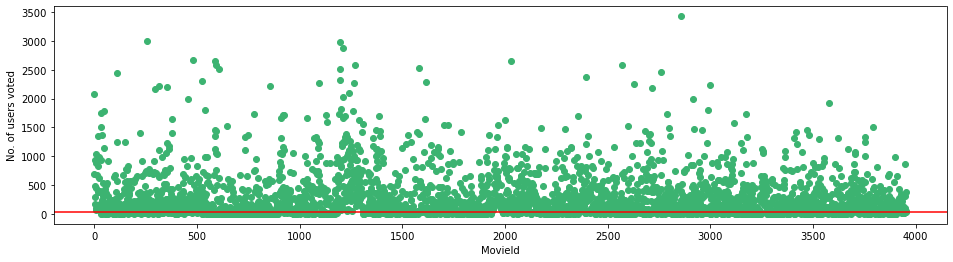

In [24]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=30,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [25]:
new_dataset=new_dataset.loc[no_user_voted[no_user_voted > 10].index,:]

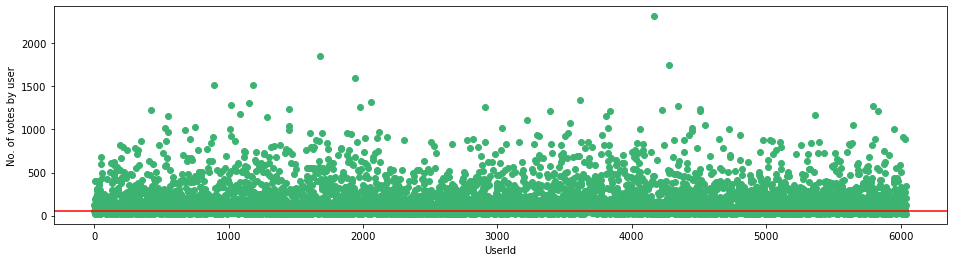

In [26]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [27]:
new_dataset=new_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index]

In [28]:
new_dataset

UserID,1,2,3,5,6,8,9,10,11,13,...,6026,6030,6031,6032,6033,6035,6036,6037,6039,6040
MovieID,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,4.0,4.0,5.0,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,3.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,3.0,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
def predict(l):
    # finds the userIds corresponding to the top 5 similarities
    # calculate the prediction according to the formula
    return (new_dataset[l.index] * l).sum(axis=1) / l.sum()

In [30]:
similarity = pd.DataFrame(cosine_similarity(
    scale(new_dataset.T.fillna(-1000))),
    index=new_dataset.columns,
    columns=new_dataset.columns)

In [38]:
similarity

UserID,1,2,3,5,6,8,9,10,11,13,...,6026,6030,6031,6032,6033,6035,6036,6037,6039,6040
UserID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.085247,0.278778,0.005670,0.229519,0.106248,0.183069,-0.040371,0.080935,0.108204,...,0.167913,0.111070,0.236651,0.123315,0.219555,-0.061643,-0.180272,-0.005647,0.167811,-0.074887
2,0.085247,1.000000,0.102469,-0.013276,0.065006,0.056542,0.044440,-0.039835,0.034744,0.141269,...,0.098812,0.036241,0.079852,0.031602,0.135163,-0.007903,-0.083323,0.020211,0.004090,0.014108
3,0.278778,0.102469,1.000000,-0.012954,0.201858,0.056503,0.133945,-0.102942,0.092330,0.210495,...,0.195328,0.105669,0.231158,0.136713,0.274800,-0.048386,-0.224019,-0.014854,0.091523,-0.079288
5,0.005670,-0.013276,-0.012954,1.000000,-0.011107,0.045400,0.050370,-0.062549,0.030039,-0.019061,...,-0.015776,-0.035464,0.006670,-0.035335,-0.006843,-0.013186,0.051914,-0.013630,-0.039376,0.029915
6,0.229519,0.065006,0.201858,-0.011107,1.000000,0.039959,0.102000,-0.039601,0.037867,0.065531,...,0.086878,0.040366,0.137470,0.092225,0.145524,-0.037560,-0.154298,-0.013409,0.119434,-0.055299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,-0.061643,-0.007903,-0.048386,-0.013186,-0.037560,0.055353,-0.020869,0.020705,0.006065,-0.017386,...,0.007352,0.055371,-0.024240,-0.071399,-0.044635,1.000000,0.018269,-0.060374,-0.053787,-0.040339
6036,-0.180272,-0.083323,-0.224019,0.051914,-0.154298,-0.015807,-0.123003,0.040326,-0.063222,-0.122624,...,-0.081787,-0.056632,-0.160938,-0.089664,-0.175936,0.018269,1.000000,0.037657,-0.041971,0.147944
6037,-0.005647,0.020211,-0.014854,-0.013630,-0.013409,-0.023904,0.027268,-0.033571,-0.014482,-0.033506,...,0.120481,-0.002233,0.022726,0.077548,-0.017046,-0.060374,0.037657,1.000000,0.065683,0.084921


In [ ]:
similar_to_fargo=movie_matrix_UII.corrwith(Fargo_user_rating)

In [32]:
# iterate each column (userID),
# for each userID find the highest five similarities
# and use to calculate the prediction for that user,
# use fillna so that original ratings dont change

res = new_dataset.apply(lambda col: ' '.join('{}'.format(mid) for mid in (0 * col).fillna(
    predict(similarity[col.name].nlargest(6).iloc[1:])).nlargest(5).index))

In [33]:
print(res)

UserID
1        2081 364 2087 2080 1196
2         1580 1356 1573 260 296
3          1240 592 858 457 1036
5          527 1784 1188 25 1094
6         919 2087 2096 1022 783
                  ...           
6035       104 165 2028 2918 780
6036      296 953 1235 3683 1947
6037     2203 1084 906 3730 1964
6039        898 910 3061 595 905
6040    1234 1207 1580 1266 3481
Length: 4247, dtype: object


# We can see similarities in rating in ratings dataset we can use same function to predict values for new users

In [37]:
np.fill_diagonal?